In [1]:
import tensorflow as tf
tf.keras.backend.set_learning_phase(1)
from PIL import Image
from keras import backend as K 
import matplotlib.pyplot as plt

from src import pre_process
from src import denseNet
from src import efficientNet

c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


All .tiff images are stained with `Martius Scarlet Blue (MSB) stain`. The two major acute ischemic stroke (AIS) etiology subtypes and their main cellular differences are:

1. **Cardio Embolism (CE):** RBCs=47.67%, WBCs=4.22%, F= 29.19%, P=18.21%

2. **Artery Atherosclerosis (AA):** RBCs=42.58%, WBCs=3.12%, F=31.31%, P=20.81%


<font size="1,5"> [Abbasi M, Fitzgerald S, Ayers-Ringler J, Espina V, Mueller C, Rucker S, Kadirvel R, Kallmes D, Brinjikji W. Proteomic Analysis of Cardioembolic and Large Artery Atherosclerotic Clots Using Reverse Phase Protein Array Technology Reveals Key Cellular Interactions Within Clot Microenvironments. Cureus. 2021 Feb 22;13(2):e13499. doi: 10.7759/cureus.13499. PMID: 33777584; PMCID: PMC7990677.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7990677/)</font>

Given this insight, we can maintain the distinct colors in the images since each cellular subtype is stained differently. Rather than preserving every pixel, we can reduce their size to enhance the efficiency of the neural network (NN) processing.

![CE](/images/CEexample1.png)

In [2]:
folder_path = "data/CE"
Image.MAX_IMAGE_PIXELS = 3000000000 
# pre_process.display_tiff_images(folder_path)


In [3]:
train_data_path = "data/train/"
test_data_path = "data/test/"

K.set_learning_phase(1)
img_width, img_height = 150,150 
nb_train_samples = 2  
nb_validation_samples = 4  
epochs = 2  #Number of times the algorithm is learning
batch_size = 3  #Number of training examples used in each iteration
n_classes = 2 

c:\Users\saraa\miniconda3\envs\final\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [4]:
train_data_path = "data/train/"
test_data_path = "data/test/"

train_generator, test_generator = pre_process.image_generator1(train_data_path, test_data_path, img_width, img_height, batch_size)

Found 5 images belonging to 2 classes.
Found 4 validated image filenames belonging to 1 classes.


`DenseNet model:`

In [5]:
# epochs = 2  
# trained_model = pre_process.get_weights(train_generator, test_generator, img_width, img_height, epochs)

In [6]:
# n_classes = 2
# dense_model = denseNet.DenseNet_model()
# architecture = dense_model.densenet_model()
# architecture.summary()

# model = models.densenet_model()  

In [7]:
# dense_model.train(train_generator, test_generator, epochs=2)

In [8]:
# class_names = ["CE", "LAA"]
# DenseNet = dense_model.predict_densenet(test_generator,class_names)

In [9]:
# print(DenseNet.history.keys())
# plt.plot(DenseNet.history['acc'])
# plt.plot(DenseNet.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

`EfficientNet model:`

In [10]:
epochs = 2  
trained_model = pre_process.get_weights_B0(train_generator, test_generator, img_width, img_height, epochs)


Epoch 1/2


2/2 [==============================] - 112s 69s/step - loss: 3.0208 - accuracy: 0.6000 - val_loss: 1.4028 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 83s 72s/step - loss: 6.2851 - accuracy: 0.2000 - val_loss: 1.6385 - val_accuracy: 1.0000


In [14]:
efficient_model = efficientNet.EfficientNet()

architecture = efficient_model.efficient_model()
architecture.summary()

# NUM_CLASSES = 2

# model = EfficientNetB6(include_top=True, weights=None, classes=NUM_CLASSES,
#     input_shape=(150, 150, 3),)
    
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

# epochs = 2  # @param {type: "slider", min:10, max:100}
# EfficientNet = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling_9 (Rescaling)     (None, 150, 150, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 150, 150, 3)          7         ['rescaling_9[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 150, 150, 3)          0         ['normalization_5[0

In [16]:
hist = efficient_model.train(train_generator, test_generator, epochs=2)

Epoch 1/2
2/2 [==============================] - 90s 69s/step - loss: 2.6212 - accuracy: 0.4000 - val_loss: 1.4314 - val_accuracy: 1.0000
Epoch 2/2
2/2 [==============================] - 65s 45s/step - loss: 2.3124 - accuracy: 0.4000 - val_loss: 1.4876 - val_accuracy: 1.0000


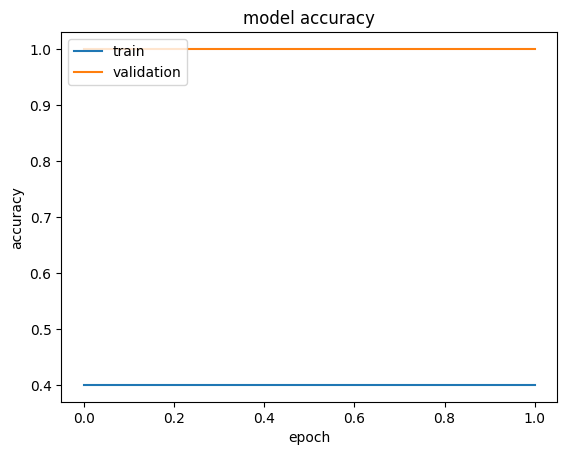

In [18]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
efficient_model.unfreeze_model(hist)

#https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/